In [26]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Download do dataset
path = kagglehub.dataset_download("sulianova/cardiovascular-disease-dataset")
df = pd.read_csv(f"{path}/cardio_train.csv", sep=';')

# Remover coluna 'id'
df = df.drop(columns=["id"], errors="ignore")

# Visualizar primeiras linhas
print("\nPrimeiras linhas do dataset:")
print(df)

# Filtrar dados v√°lidos
df_limpo = df[
    (df["age"] >= 10000) & (df["age"] <= 30000) &
    (df["height"] >= 120) & (df["height"] <= 220) &
    (df["weight"] >= 30) & (df["weight"] <= 200) &
    (df["ap_hi"] >= 90) & (df["ap_hi"] <= 250) &
    (df["ap_lo"] >= 60) & (df["ap_lo"] <= 150)
].copy()

# Adicionar coluna com idade em anos
df_limpo["age_years"] = (df_limpo["age"] / 365.25).astype(int)

# Separar vari√°veis X e y
X = df_limpo.drop(columns=["cardio"])
y = df_limpo["cardio"]

# Definir vari√°veis categ√≥ricas esperadas
provavel_categoricas = ["gender", "cholesterol", "gluc", "smoke", "alco", "active"]

# Identificar vari√°veis num√©ricas (depois da limpeza e transforma√ß√£o)
features_all = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Separar entre cont√≠nuas e categ√≥ricas
features_bin = [col for col in features_all if col in provavel_categoricas]
features_cont = [col for col in features_all if col not in provavel_categoricas]

# Visualizar
print("\nVari√°veis CONT√çNUAS:")
print(", ".join(features_cont))

print("\nVari√°veis CATEG√ìRICAS ou BIN√ÅRIAS:")
print(", ".join(features_bin))

print("\n=== üìà Vari√°veis CONT√çNUAS ===")
print("age_years   -> Idade em anos (convertida de 'age' em dias)")
print("height      -> Altura em cent√≠metros")
print("weight      -> Peso em quilogramas")
print("ap_hi       -> Press√£o arterial sist√≥lica (m√°xima)")
print("ap_lo       -> Press√£o arterial diast√≥lica (m√≠nima)")

print("\n=== üîò Vari√°veis CATEG√ìRICAS ou BIN√ÅRIAS ===")
print("gender      -> Sexo: 1 = homem, 2 = mulher")
print("cholesterol -> N√≠vel de colesterol: 1 = normal, 2 = alto, 3 = muito alto")
print("gluc        -> N√≠vel de glicose: 1 = normal, 2 = alto, 3 = muito alto")
print("smoke       -> Fumante: 0 = n√£o, 1 = sim")
print("alco        -> Consome √°lcool: 0 = n√£o, 1 = sim")
print("active      -> Fisicamente ativo: 0 = n√£o, 1 = sim")

print("\n=== üéØ Vari√°vel Alvo ===")
print("cardio      -> Presen√ßa de doen√ßa cardiovascular: 0 = n√£o, 1 = sim")




Primeiras linhas do dataset:
         age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0      18393       2     168    62.0    110     80            1     1      0   
1      20228       1     156    85.0    140     90            3     1      0   
2      18857       1     165    64.0    130     70            3     1      0   
3      17623       2     169    82.0    150    100            1     1      0   
4      17474       1     156    56.0    100     60            1     1      0   
...      ...     ...     ...     ...    ...    ...          ...   ...    ...   
69995  19240       2     168    76.0    120     80            1     1      1   
69996  22601       1     158   126.0    140     90            2     2      0   
69997  19066       2     183   105.0    180     90            3     1      0   
69998  22431       1     163    72.0    135     80            1     2      0   
69999  20540       1     170    72.0    120     80            2     1      0   

       al

Carregando Dataset, separando vari√°veis cont√≠nuas e categ√≥ricas/bin√°rias.

=== Bloco de An√°lise Explorat√≥ria ===


=== 1. Histogramas das vari√°veis cont√≠nuas por classe ===


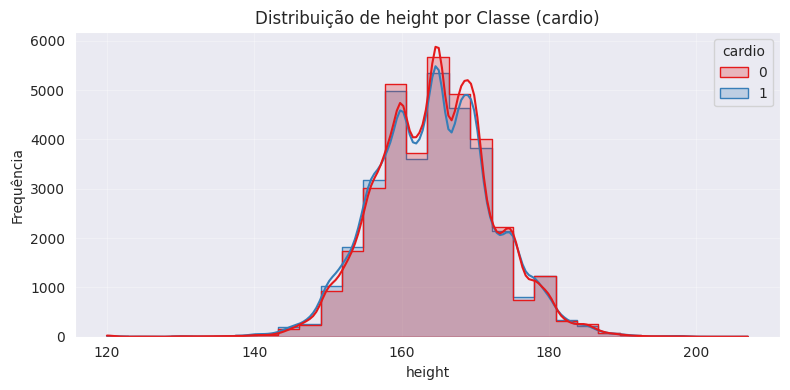

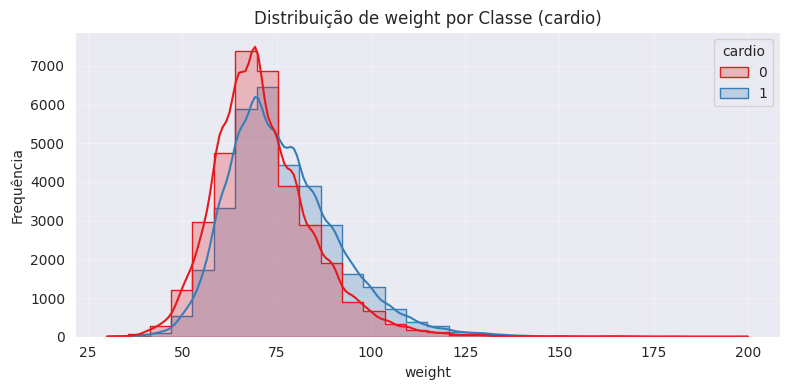

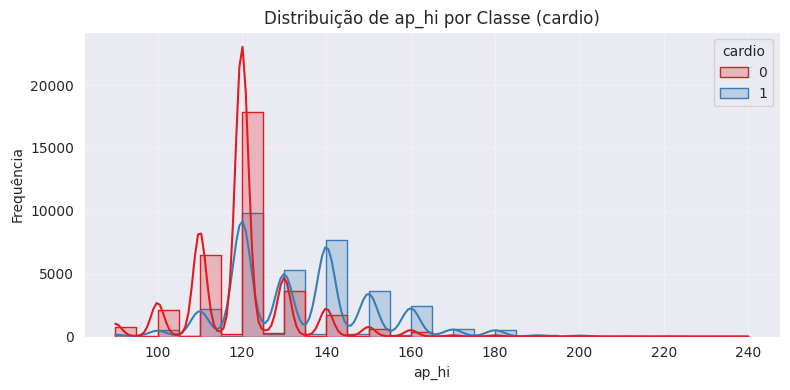

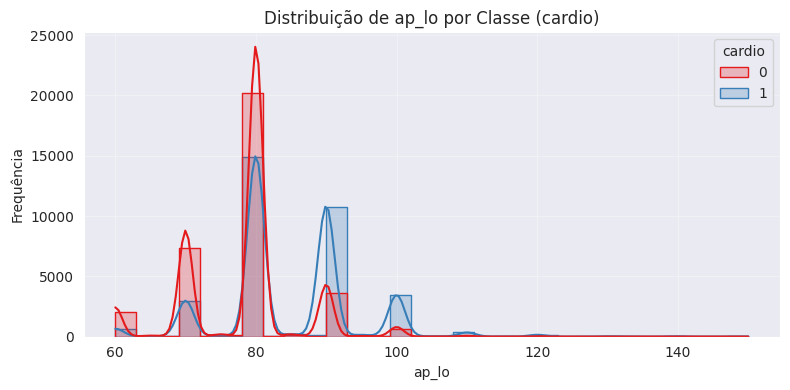

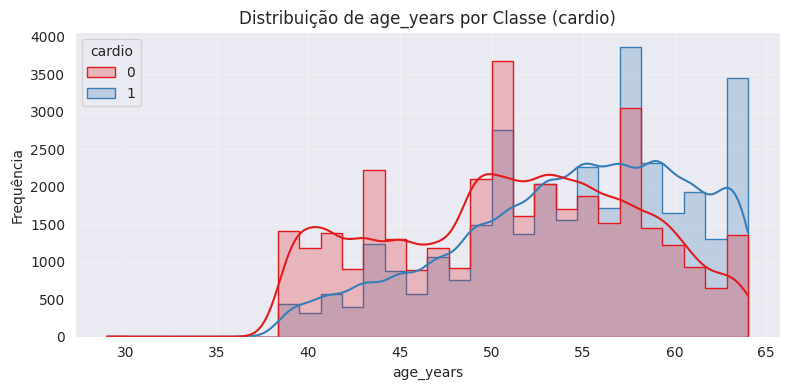


=== 2. Distribui√ß√£o de Faixa Et√°ria por Classe ===


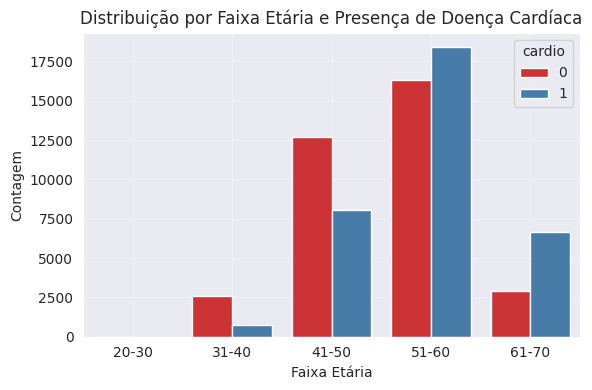


=== 3. N√≠vel de Atividade F√≠sica por Classe ===


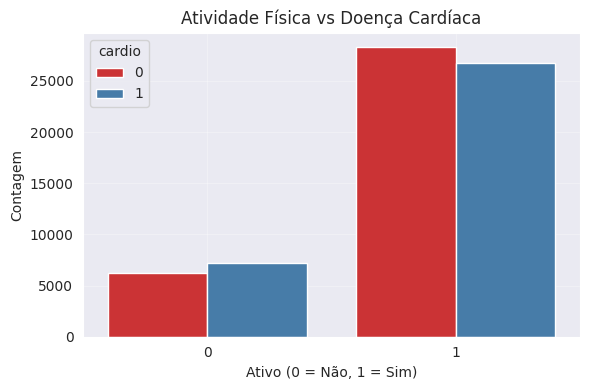


=== 4. Fumante por Classe ===


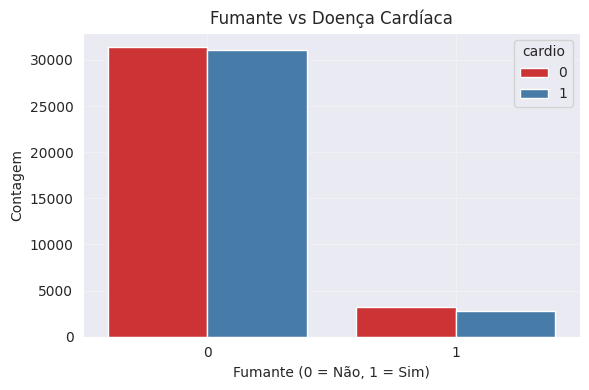


=== 5. Dispers√£o entre vari√°veis cont√≠nuas (pairplot) ===


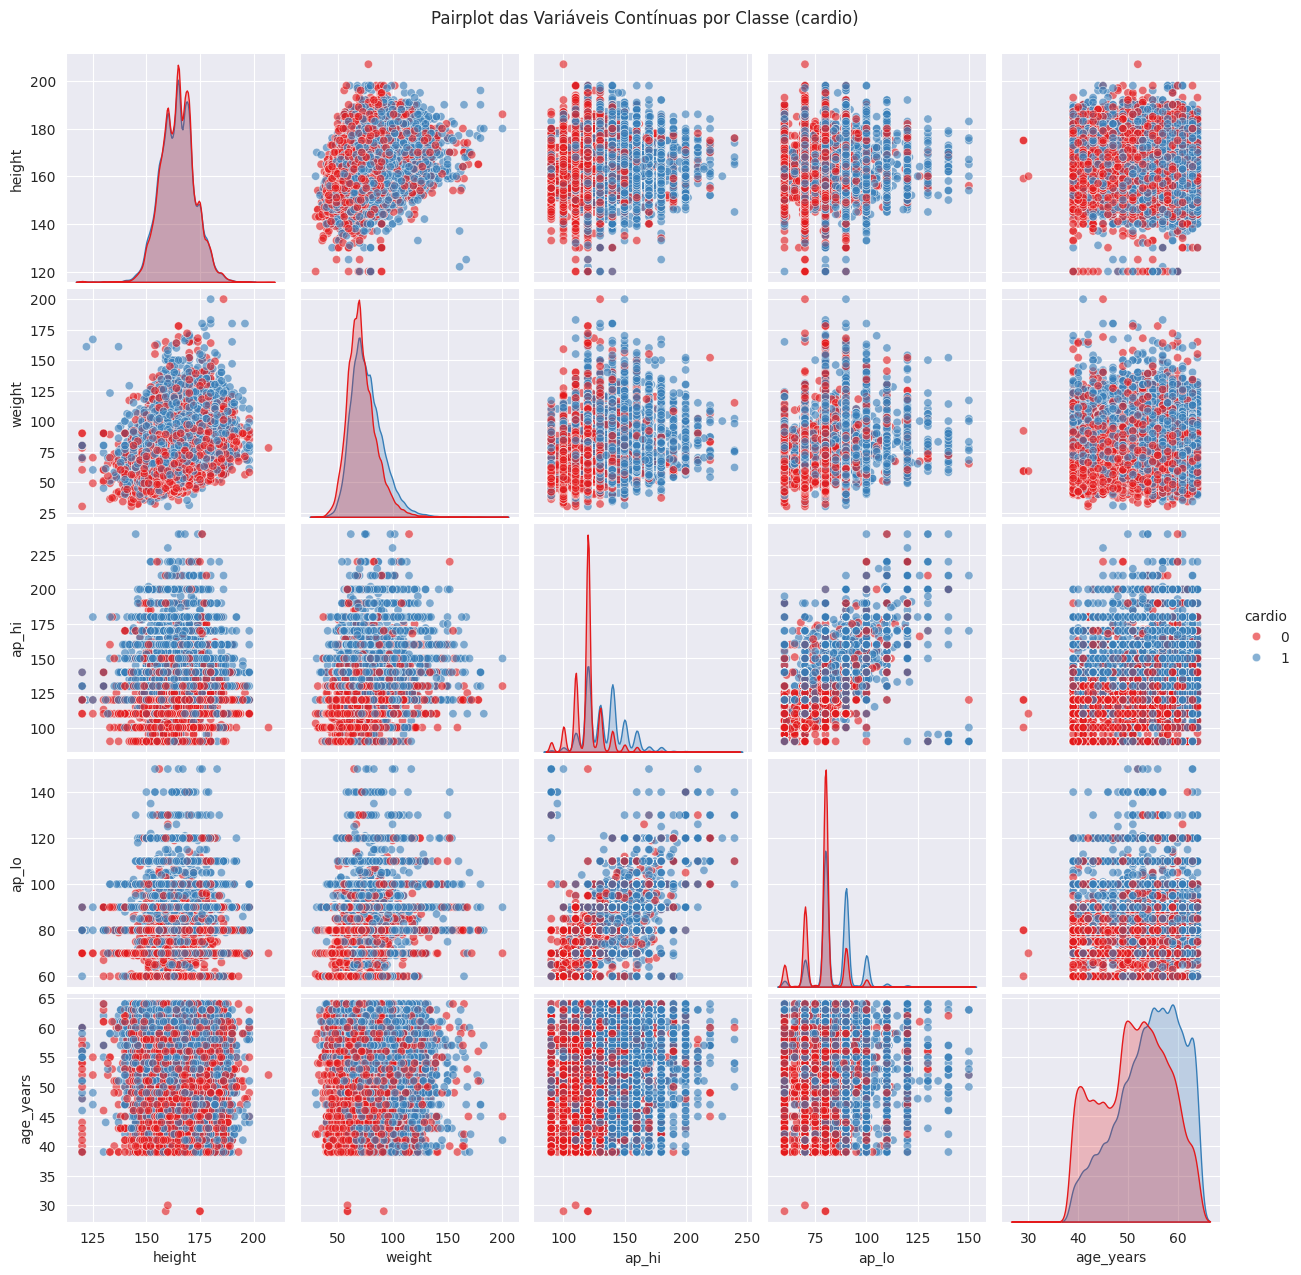


=== 6. PCA com Vari√°veis CONT√çNUAS (normalizadas) ===


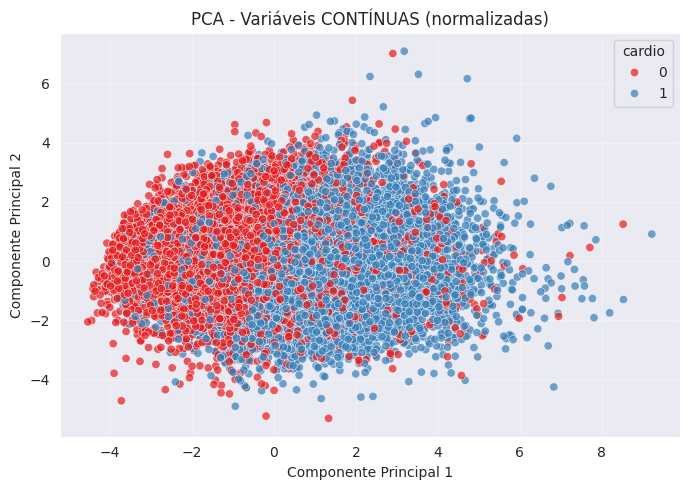

In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

print("=== Bloco de An√°lise Explorat√≥ria ===\n")

# Remover 'age' cru da lista de cont√≠nuas (j√° temos age_years)
features_cont = [col for col in features_cont if col != "age"]

# 1. Histogramas das vari√°veis cont√≠nuas por classe
print("\n=== 1. Histogramas das vari√°veis cont√≠nuas por classe ===")
for feature in features_cont:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df_limpo, x=feature, hue='cardio', kde=True, bins=30, palette='Set1', element='step')
    plt.title(f'Distribui√ß√£o de {feature} por Classe (cardio)')
    plt.xlabel(feature)
    plt.ylabel('Frequ√™ncia')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# 2. Countplot de Faixa Et√°ria por Classe
print("\n=== 2. Distribui√ß√£o de Faixa Et√°ria por Classe ===")
df_limpo["faixa_etaria"] = pd.cut(
    df_limpo["age_years"],
    bins=[20, 30, 40, 50, 60, 70],
    labels=["20-30", "31-40", "41-50", "51-60", "61-70"]
)
plt.figure(figsize=(6, 4))
sns.countplot(data=df_limpo, x='faixa_etaria', hue='cardio', palette='Set1')
plt.title('Distribui√ß√£o por Faixa Et√°ria e Presen√ßa de Doen√ßa Card√≠aca')
plt.xlabel('Faixa Et√°ria')
plt.ylabel('Contagem')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Countplot de ATIVO (active)
print("\n=== 3. N√≠vel de Atividade F√≠sica por Classe ===")
plt.figure(figsize=(6, 4))
sns.countplot(data=df_limpo, x='active', hue='cardio', palette='Set1')
plt.title('Atividade F√≠sica vs Doen√ßa Card√≠aca')
plt.xlabel('Ativo (0 = N√£o, 1 = Sim)')
plt.ylabel('Contagem')
X_scaled[features_cont] = scaler.fit_transform(X_scaled[features_cont])

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 4. Countplot de FUMANTE (smoke)
print("\n=== 4. Fumante por Classe ===")
plt.figure(figsize=(6, 4))
sns.countplot(data=df_limpo, x='smoke', hue='cardio', palette='Set1')
plt.title('Fumante vs Doen√ßa Card√≠aca')
plt.xlabel('Fumante (0 = N√£o, 1 = Sim)')
plt.ylabel('Contagem')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 5. Pairplot entre vari√°veis cont√≠nuas
print("\n=== 5. Dispers√£o entre vari√°veis cont√≠nuas (pairplot) ===")
sns.pairplot(
    data=df_limpo,
    vars=features_cont,
    hue='cardio',
    palette='Set1',
    diag_kind='kde',
    plot_kws={'alpha': 0.6}
)
plt.suptitle("Pairplot das Vari√°veis Cont√≠nuas por Classe (cardio)", y=1.02)
plt.show()

# 6. PCA com vari√°veis CONT√çNUAS (com normaliza√ß√£o)
print("\n=== 6. PCA com Vari√°veis CONT√çNUAS (normalizadas) ===")
scaler_cont = StandardScaler()
X_cont_scaled = scaler_cont.fit_transform(df_limpo[features_cont])

pca_cont = PCA(n_components=2)
X_pca_cont = pca_cont.fit_transform(X_cont_scaled)

plt.figure(figsize=(7, 5))
sns.scatterplot(x=X_pca_cont[:, 0], y=X_pca_cont[:, 1], hue=y, palette='Set1', alpha=0.7)
plt.title("PCA - Vari√°veis CONT√çNUAS (normalizadas)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 7. PCA com vari√°veis CONT√çNUAS (normalizadas) + BIN√ÅRIAS/CATEG√ìRICAS (sem normalizar)
print("\n=== 7. PCA com Vari√°veis CONT√çNUAS (normalizadas) + BIN√ÅRIAS/CATEG√ìRICAS ===")

scaler_cont = StandardScaler()
X_cont_scaled = scaler_cont.fit_transform(df_limpo[features_cont])
X_cont_df = pd.DataFrame(X_cont_scaled, columns=features_cont, index=df_limpo.index)

X_combined = pd.concat([X_cont_df, df_limpo[features_bin].astype(float)], axis=1)

pca_combined = PCA(n_components=2)
X_pca_combined = pca_combined.fit_transform(X_combined)

plt.figure(figsize=(7, 5))
sns.scatterplot(x=X_pca_combined[:, 0], y=X_pca_combined[:, 1], hue=y, palette='Set1', alpha=0.7)
plt.title("PCA - CONT√çNUAS (normalizadas) + BIN√ÅRIAS/CATEG√ìRICAS (sem normalizar)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

=== Histogramas Antes e Depois da Normaliza√ß√£o ===


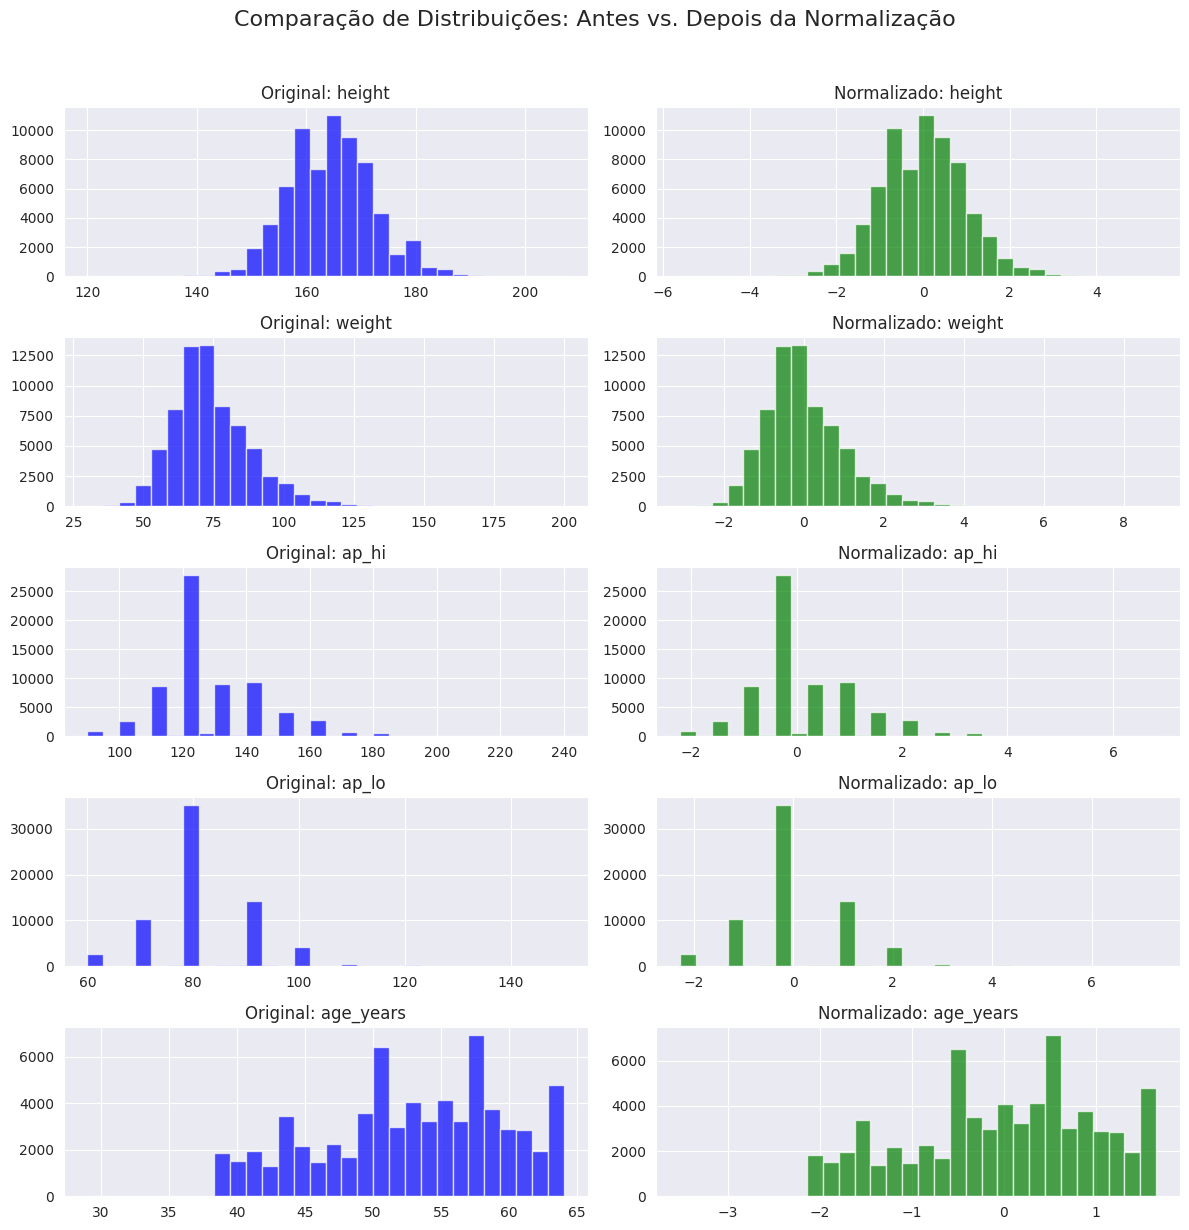

In [28]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Normaliza√ß√£o com StandardScaler
scaler = StandardScaler()
X_scaled = df_limpo.copy()
X_scaled[features_cont] = scaler.fit_transform(X_scaled[features_cont])

print("=== Histogramas Antes e Depois da Normaliza√ß√£o ===")

# Plot comparativo
fig, axes = plt.subplots(len(features_cont), 2, figsize=(12, len(features_cont)*2.5))
fig.suptitle('Compara√ß√£o de Distribui√ß√µes: Antes vs. Depois da Normaliza√ß√£o', fontsize=16)

for i, feature in enumerate(features_cont):
    axes[i, 0].hist(df_limpo[feature], bins=30, color='blue', alpha=0.7)
    axes[i, 0].set_title(f'Original: {feature}')

    axes[i, 1].hist(X_scaled[feature], bins=30, color='green', alpha=0.7)
    axes[i, 1].set_title(f'Normalizado: {feature}')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Separar treino e teste (mesma divis√£o usada nos demais modelos)
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y, test_size=0.20, stratify=y, random_state=42
)

# 2. Definir modelo-base MLP (os hiperpar√¢metros ser√£o ajustados pelo grid)
mlp_base = MLPClassifier(
    solver='adam',
    early_stopping=True,            # usa 10 % do treino p/ valida√ß√£o interna
    validation_fraction=0.10,
    random_state=42,
    verbose=False
)

# 3. Grid de hiperpar√¢metros a testar
param_grid = {
    "hidden_layer_sizes": [(20,), (50,), (100,), (50, 50), (75, 75), (100, 100)],
    "activation": ["relu", "tanh", "logistic"],
    "learning_rate_init": [0.001, 0.01, 0.1],
    "max_iter": [500, 750, 1000],
}

# 4. GridSearchCV com valida√ß√£o cruzada 5-fold
grid = GridSearchCV(
    estimator=mlp_base,
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,        # usa todos os n√∫cleos dispon√≠veis
    verbose=2
)

# 5. Treinar (Grid Search encontra a melhor combina√ß√£o)
grid.fit(X_train, y_train)

print("\nMelhores hiperpar√¢metros encontrados:")
print(grid.best_params_)
print(f"Melhor acur√°cia m√©dia (cross-val): {grid.best_score_:.4f}")

# 6. Avaliar no conjunto de teste com o melhor modelo
best_mlp = grid.best_estimator_
y_pred = best_mlp.predict(X_test)

print("\n=== MATRIZ DE CONFUS√ÉO ===")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\n=== RELAT√ìRIO DE CLASSIFICA√á√ÉO ===")
print(classification_report(y_test, y_pred))

# Heatmap da Matriz de Confus√£o
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Sem Doen√ßa','Com Doen√ßa'],
            yticklabels=['Sem Doen√ßa','Com Doen√ßa'])
plt.title('Matriz de Confus√£o ‚Äì MLP (GridSearchCV)')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

print("\n=== Avalia√ß√£o Final do Modelo MLP (Melhor Modelo do GridSearch) ===")

# Previs√µes no conjunto de teste
y_pred_mlp = best_mlp.predict(X_test)

# Relat√≥rio de Classifica√ß√£o
print("\nClassification Report (base de teste):")
print(classification_report(y_test, y_pred_mlp))

# Matriz de Confus√£o
print("\nMatriz de Confus√£o (base de teste):")
cm = confusion_matrix(y_test, y_pred_mlp)
print(cm)

# Acur√°cia e F1-Score
print("\nM√©tricas Globais:")
print(f"Acur√°cia: {accuracy_score(y_test, y_pred_mlp):.4f}")
print(f"F1-Score Macro: {f1_score(y_test, y_pred_mlp, average='macro'):.4f}")

# Heatmap da Matriz de Confus√£o
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title('üü† Matriz de Confus√£o - MLP (Melhor Modelo do GridSearch)')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.show()

# Valida√ß√£o Cruzada com o melhor modelo
print("\nAvalia√ß√£o com Valida√ß√£o Cruzada (5-Fold):")
cv_scores_mlp = cross_val_score(best_mlp, X, y, cv=5, scoring='accuracy')
print("Acur√°cias em cada fold:", cv_scores_mlp)
print(f"Acur√°cia M√©dia (cross-validation): {cv_scores_mlp.mean():.4f}")
